<a href="https://colab.research.google.com/github/SwarnaUmasankar/NN/blob/main/Mod2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
##imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
##import dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [6]:
print(f"Training images shape:{x_train.shape}")
print(f"Training labels shape:{y_train.shape}")
print(f"Test images shape:{x_test.shape}")
print(f"Test labels shape:{y_test.shape}")

Training images shape:(50000, 32, 32, 3)
Training labels shape:(50000, 1)
Test images shape:(10000, 32, 32, 3)
Test labels shape:(10000, 1)


In [7]:
NUM_CLASSES=10
classes=[
         'airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck'
]

In [8]:
plt.style.use('dark_background')

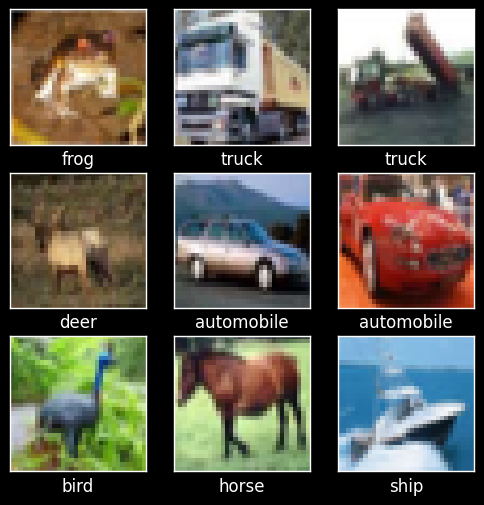

In [9]:
## visualize
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
plt.show();

In [10]:
##normalize img
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [11]:
##check img
x_train[0].dtype,x_train[0].max(),x_train[0].min

(dtype('float32'), 1.0, <function ndarray.min>)

In [12]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [13]:
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

BUILD THE MODEL


In [14]:
model=Sequential()

In [15]:
## add conv layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu',
    input_shape=(32, 32, 3)
))

model.add(
    MaxPool2D(
        pool_size=(2, 2),
        padding='same',
        )
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
##add 2nd conv layer
model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))

##another pooling layer
model.add(MaxPool2D(2, 2))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
##add 3rd conv layer
model.add(Conv2D(64,(3, 3),activation='relu',padding='same'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
Total params: 28640 (111.88 KB)
Trainable params: 28640 

add bottom part of model


In [21]:
#flatten the o/p
model.add(Flatten())

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [23]:
model.layers

In [24]:
model.layers[-1].output.shape

TensorShape([None, 4096])

In [25]:
##add dense layer
model.add(Dense(256, activation='relu'))

##output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [27]:
optimizer=Adam(learning_rate=0.01)

In [28]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training the model

In [29]:
NUM_EPOCHS=50
BATCH_SIZE=128

In [30]:
history=model.fit(
    x_train,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test,y_test)
)

Epoch 1/50
391/391 [==============================] - 7s 9ms/step - loss: 1.8902 - accuracy: 0.3129 - val_loss: 1.5651 - val_accuracy: 0.4212
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5451 - accuracy: 0.4363 - val_loss: 1.4787 - val_accuracy: 0.4553
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4635 - accuracy: 0.4695 - val_loss: 1.4362 - val_accuracy: 0.4806
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3944 - accuracy: 0.4980 - val_loss: 1.5080 - val_accuracy: 0.4536
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3654 - accuracy: 0.5071 - val_loss: 1.4512 - val_accuracy: 0.4715
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3272 - accuracy: 0.5243 - val_loss: 1.4272 - val_accuracy: 0.4840
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2895 - accuracy: 0.5349 - val_loss: 1.4220 - val_accuracy: 0.4935
Epoch 

In [31]:
## function to plot loss and accuracy
def plot_history(history):
  fig = plt.figure(figsize=(10, 4))
## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot (history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel( 'Epochs')
  plt.ylabel( 'Accuracy' )
  plt.legend(['train', 'test'], loc='lower right')

## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history[ 'loss' ] )
  plt.plot(history.history[ 'val_loss' ] )
  plt.title( 'Loss of Model')
  plt.xlabel( 'Epochs')
  plt.ylabel( 'Loss')
  plt.legend(['train', 'test '], loc= 'upper right')

  plt.tight_layout()
  fig.show();


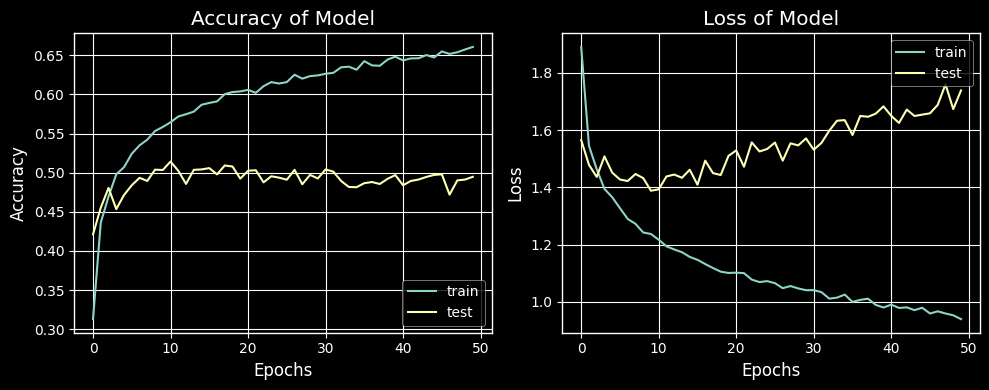

In [32]:
plot_history(history)

In [33]:
model2=Sequential()

In [34]:
##layers 1
model2.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model2.add(MaxPool2D((2,2)))

In [35]:
##layer 2
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D((2,2)))
##add dropout
model2.add(Dropout(0.3))

In [36]:
##layer 3
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D((2,2)))
##add dropout
model2.add(Dropout(0.3))

In [37]:
model2.add(Flatten())

model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.3))

##output layer
model2.add(Dense(NUM_CLASSES,activation='softmax'))

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

Adding learning rate scheduler

In [39]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [40]:
def simple_decay(epoch,lr):
  if epoch<30:
    lrate=lr
  elif epoch<60:
    lrate=0.0005
  else:
    lrate=0.0001
  return lrate

In [41]:
##create scheduler
scheduler=LearningRateScheduler(simple_decay)

In [42]:
callbacks=[scheduler]

In [43]:
optimizer=Adam(learning_rate=0.001)

In [44]:
model2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
history2=model2.fit(
    x_train,
    y_train,
    epochs=100,
    shuffle=True,
    validation_data=(x_test,y_test),
    callbacks=callbacks
)

Epoch 1/100
1563/1563 [==============================] - 12s 5ms/step - loss: 1.5726 - accuracy: 0.4226 - val_loss: 1.2686 - val_accuracy: 0.5427 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2210 - accuracy: 0.5633 - val_loss: 1.0331 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0689 - accuracy: 0.6212 - val_loss: 0.9161 - val_accuracy: 0.6785 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9850 - accuracy: 0.6498 - val_loss: 0.8732 - val_accuracy: 0.6984 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9195 - accuracy: 0.6747 - val_loss: 0.8430 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8818 - accuracy: 0.6874 - val_loss: 0.7877 - val_accuracy: 0.7282 - lr: 0.0010
Epoch 7/100
1563/1563 [============================

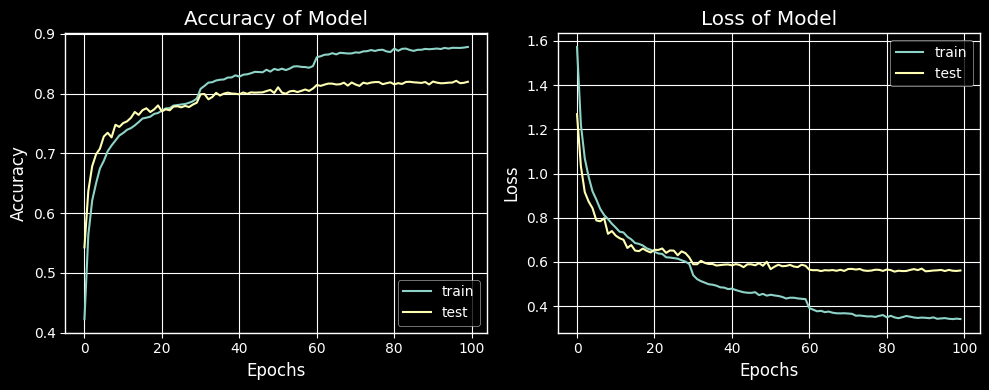

In [46]:
plot_history(history2)